# AR Model
by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  
<a href="ar-model.slides.html">Slides</a>

## AR($p$) Model 

- The AR($p$) model is:
$y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t$
- $\phi_1$, $\phi_2$, $\ldots$, $\phi_p$ are the autoregressive parameters that quantify the influence of past values on the current value
- $\varepsilon_t$ is white noise error term (or innovation) with mean zero and constant variance, $\sigma^2$


## AR($1$) Model

- An AR($1$) Model is a special case of the AR($p$) 
  
  $$
  y_t = \phi y_{t-1} + \varepsilon_t
  $$
  
- An AR($1$) is often used to model cyclical dynamics
- e.g., the fluctuations in an AR(1) series where $\phi = 0.95$ appear much more persistent (i.e., smoother) than those where $\phi = 0.4$

### AR($1$) for any mean

- An AR($1$) model is covariance stationary if $|\phi| < 1$
- Suppose $E[y_t] = E[y_{t-1}] \equiv \bar{y}$
- Then $E[y_t] = 0$ since $E[y_t] = \phi E[y_{t-1}] + E[\varepsilon_t] \rightarrow (1-\phi)\bar{y} = 0 \rightarrow \bar{y} = 0$
- Instead consider the AR(1) model with a generic mean: $y_t - \mu = \phi(y_{t-1} - \mu) + \varepsilon_t$
- Then $E[y_t] = \mu$ since

  \begin{align*}
    E[y_t] - \mu &= \phi E[y_{t-1}] -\phi\mu + E[\varepsilon_t] \\
    \rightarrow (1-\phi)\bar{y} &= (1-\phi)\mu \\
    \rightarrow \bar{y} &= \mu
  \end{align*}

- You can rearrange the (any mean) AR(1) model as $y_t = (1-\phi)\mu + \phi y_{t-1} + \varepsilon_t$

### AR(1) as MA($\infty$)

- The AR(1) model structure is the same at all points in time

   \begin{align*}
    y_t &= \phi y_{t-1} + \varepsilon_t \\
    y_{t-1} &= \phi y_{t-2} + \varepsilon_{t-1} \\
    y_{t-2} &= \phi y_{t-3} + \varepsilon_{t-2}
  \end{align*}

- Combine, i.e., recursively substitute, to get $y_t = \phi^3 y_{t-3} + \phi^2 \varepsilon_{t-2}+ \phi \varepsilon_{t-1} + \varepsilon_t$
- Rinse and repeat to get $y_t = \sum_{i=0}^\infty \phi^i \varepsilon_{t-i}$ (i.e., the MA($\infty$) Model or Wold Representation)
- And an MA($\infty$) is invertible back to an AR($1$) so long as $|\phi| < 1$.
- An AR model that can be written as an MA($\infty$) is **causal** (or exhibits **causality**).
- That property differentiates it from an **invertible** MA model, which can be expressed as an AR($\infty$) model.

### Variance

- Suppose $\mu=0$ without loss of generality.
- Given $Var(\varepsilon_t) = \sigma^2$ and $|\phi| < 1$, then $\gamma(0) \equiv Var(y_t)$

  \begin{align*}
    &= Var\left(\sum_{i=0}^\infty \phi^i \varepsilon_{t-i}\right) \\
    &= Var(\varepsilon_t + \phi \varepsilon_{t-1} + \phi^2 \varepsilon_{t-2} + \phi^3 \varepsilon_{t-3} + \phi^4 \varepsilon_{t-4} + \cdots)    \\
    &= \sigma^2 + \phi^2 \sigma^2 + (\phi^2)^2 \sigma^2 + (\phi^3)^2 \sigma^2 + (\phi^4)^2 \sigma^2 + \cdots \\
    &= \sigma^2(1 + \phi^2 + (\phi^2)^2 + (\phi^2)^3 + (\phi^2)^4 + \cdots ) \\
    &= \sigma^2/(1-\phi^2)
  \end{align*}

  See [Geometric Series](https://en.wikipedia.org/wiki/Geometric_series).
- $Std(y_t) = \sqrt{\sigma^2/(1-\phi^2)}$

### Autocorrelation

- $\gamma(1) = E[y_t y_{t-1}]$

  \begin{align*}
    &= E[(\phi y_{t-1} + \varepsilon_t)y_{t-1}] \\
    &= E[\phi y_{t-1}^2] + E[\varepsilon_t y_{t-1}] \\
    &= \phi Var[y_{t-1}] + 0 \\
    &= \phi \gamma(0) \\
    &= \phi \sigma^2/(1-\phi^2)
  \end{align*}

- $\rho(1) = \gamma(1)/\gamma(0) = \phi$
- $\gamma(2) = E[y_t y_{t-2}] = E[(\phi^2y_{t-2} + \varepsilon_t + \phi \varepsilon_{t-1})y_{t-2}] = \phi^2 E[y_{t-2}^2] = \phi^2 \gamma(0)$
- $\rho(2) \equiv \gamma(2)/\gamma(0) = \phi^2$
- In general, $\rho(k) = \phi^k$, which is a very nice looking ACF.
- Thus, for an AR($1$) process/model we can refer to $\phi$ as the autocorrelation (AC) parameter/coefficient.

## AR Model as DGP

Let's compare a couple different AR models to their underlying white noise.
1. White noise:

   $$
   y_t = \mu + \varepsilon_t
   $$
   
3. AR(1), low AC:

   $$
   y_t = (1-\phi_l)\mu + \phi_l y_{t-1} + \varepsilon_t
   $$

4. AR(1), high AC:

   $$
   y_t = (1-\phi_h)\mu + \phi_h y_{t-1} + \varepsilon_t
   $$

In [1]:
# Libraries
import numpy as np
# Assign parameters
T = 501; mu = 2; phi_l = 0.5; phi_h = 0.9;
# Draw random numbers
rng = np.random.default_rng(seed=0)
eps = rng.standard_normal(T)
# Simulate time series
y = np.zeros([T,3])
for t in range(1,T):
    y[t,0] = mu + eps[t]
    y[t,1] = (1-phi_l)*mu + phi_l*y[t-1,1] + eps[t]
    y[t,2] = (1-phi_h)*mu + phi_h*y[t-1,2] + eps[t]

In [2]:
# Libraries
import pandas as pd
# Convert to DataFrame and plot
df = pd.DataFrame(y)
df.columns = ['White Noise','AR(1) low AC','AR(1) high AC']

White Noise: E(y) = 1.97, Std(y) = 1.02, AC(y) = -0.02
AR(1) low AC: E(y) = 1.94, Std(y) = 1.16, AC(y) = 0.48
AR(1) high AC: E(y) = 1.72, Std(y) = 2.18, AC(y) = 0.88


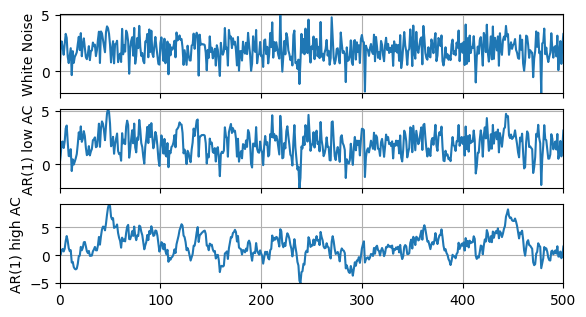

In [3]:
# libraries
import matplotlib.pyplot as plt
# Plot variables
fig, axs = plt.subplots(len(df.columns),figsize=(6.5,3.5))
for idx, ax in enumerate(axs.flat):
    col = df.columns[idx]; y = df[col]
    ax.plot(y); ax.set_ylabel(col)
    ax.grid(); ax.autoscale(tight=True); ax.label_outer()
    print(f'{col}: \
E(y) = {y.mean():.2f}, Std(y) = {y.std():.2f}, \
AC(y) = {y.corr(y.shift(1)):.2f}')

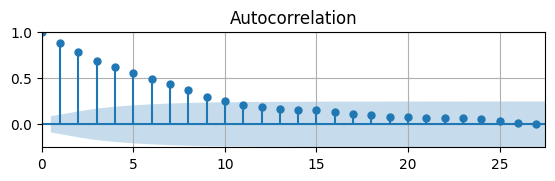

In [4]:
# Auto-correlation function
from statsmodels.graphics.tsaplots import plot_acf as acf
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
acf(df['AR(1) high AC'],ax)
ax.grid(); ax.autoscale(tight=True);

In [5]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
# Define model
mod = ARIMA(df['AR(1) high AC'],order=(1,0,0))
# Estimate model
res = mod.fit()
summary = res.summary()
# Print summary tables
tab0 = summary.tables[0].as_html()
tab1 = summary.tables[1].as_html()
tab2 = summary.tables[2].as_html()
# print(tab0); print(tab1); print(tab2)

### Estimation Results

<table class="simpletable">
<tr>
  <th>Dep. Variable:</th>     <td>AR(1) high AC</td>  <th>  No. Observations:  </th>    <td>501</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARIMA(1, 0, 0)</td>  <th>  Log Likelihood     </th> <td>-718.607</td>
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>  <td>    1.6774</td> <td>    0.390</td> <td>    4.302</td> <td> 0.000</td> <td>    0.913</td> <td>    2.442</td>
</tr>
<tr>
  <th>ar.L1</th>  <td>    <font color="#FF0000">0.8843</font></td> <td>    0.021</td> <td>   41.211</td> <td> <font color="#FF0000">0.000</font></td> <td>    0.842</td> <td>    0.926</td>
</tr>
<tr>
  <th>sigma2</th> <td>    <font color="#FF0000">1.0282</font></td> <td>    0.059</td> <td>   17.442</td> <td> 0.000</td> <td>    0.913</td> <td>    1.144</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Heteroskedasticity (H):</th> <td>1.14</td> <th>  Skew:              </th> <td><font color="#FF0000">-0.15</font</td>
</tr>
<tr>
  <th>Prob(H) (two-sided):</th>    <td>0.41</td> <th>  Kurtosis:          </th> <td><font color="#FF0000">3.45</font</td> 
</tr>
</table>

- Parameter estimates are close to DGP and significantly different from $0$
- Residuals have skewness near $0$ and kurtosis near $3$ so they are probably normally distributed

## Modeling UR as AR($1$)
- The U.S. unemployment rate is very persistent.
- What if we model it with an AR(1)?

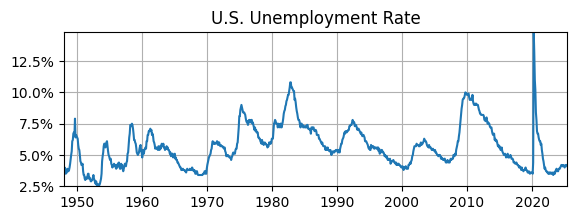

In [6]:
# Libraries
from fredapi import Fred
import pandas as pd
# Read Data
fred_api_key = pd.read_csv('fred_api_key.txt', header=None)
fred = Fred(api_key=fred_api_key.iloc[0,0])
data = fred.get_series('UNRATE').to_frame(name='UR')
data.index = pd.DatetimeIndex(data.UR.index.values,freq=data.UR.index.inferred_freq)
# Plot
fig, ax = plt.subplots(figsize=(6.5,2));
ax.plot(data.UR); ax.set_title('U.S. Unemployment Rate');
ax.yaxis.set_major_formatter('{x:,.1f}%')
ax.grid(); ax.autoscale(tight=True)

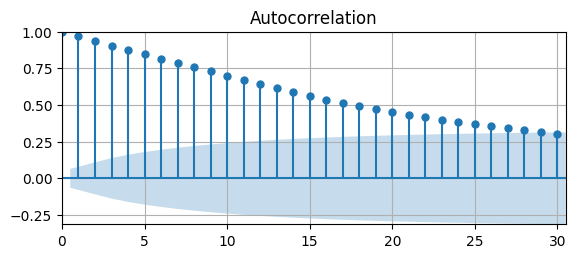

In [7]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,2.5))
acf(data.UR,ax);
ax.grid(); ax.autoscale(tight=True)

- The ACF decays very slow $\rightarrow$ UR might be non-stationary.
- Let's assume it is stationary for a moment and estimate an AR($1$) model

In [8]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
# Define model
mod = ARIMA(data.UR,order=(1,0,0))
# Estimate model
res = mod.fit()
summary = res.summary()
# Print summary tables
tab0 = summary.tables[0].as_html()
tab1 = summary.tables[1].as_html()
tab2 = summary.tables[2].as_html()
#print(tab0); print(tab1); print(tab2)

### Estimation Results

<table class="simpletable">
<tr>
  <th>Dep. Variable:</th>         <td>VALUE</td>      <th>  No. Observations:  </th>    <td>925</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARIMA(1, 0, 0)</td>  <th>  Log Likelihood     </th> <td>-496.551</td>
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>  <td>    5.5470</td> <td>    0.761</td> <td>    7.289</td> <td> 0.000</td> <td>    4.055</td> <td>    7.039</td>
</tr>
<tr>
  <th>ar.L1</th>  <td>    0.9704</td> <td>    0.008</td> <td>  122.023</td> <td> 0.000</td> <td>    0.955</td> <td>    0.986</td>
</tr>
<tr>
  <th>sigma2</th> <td>    0.1708</td> <td>    0.001</td> <td>  159.798</td> <td> 0.000</td> <td>    0.169</td> <td>    0.173</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Heteroskedasticity (H):</th> <td>6.35</td> <th>  Skew:              </th>    <td><font color="#FF0000">16.87</font></td>  
</tr>
<tr>
  <th>Prob(H) (two-sided):</th>    <td>0.00</td> <th>  Kurtosis:          </th>   <td><font color="#FF0000">428.90</font></td>  
</tr>
</table>

- Estimate of AR coeffecient is very high at $0.9704$, but the data is not a random walk
- Residuals are skewed and have excess kurtosis $\rightarrow$ model is missing nonlinearity

### Actual vs. Simulated Data

- What if we simulated data from AR(1) model setting the parameters to the previous estimates?
- What does a simulation from this estimated model look like?

In [9]:
# Assign parameters
T = len(data.UR); mu = 5.547; rho = 0.9704; sigma = np.sqrt(0.1708);
# Draw random numbers
rng = np.random.default_rng(seed=0)
eps = rng.standard_normal(T)
# Simulate time series
URsim = mu*np.ones([T,1])
for t in range(1,T):
    URsim[t,0] = (1-rho)*mu + rho*URsim[t-1,0] + sigma*eps[t];

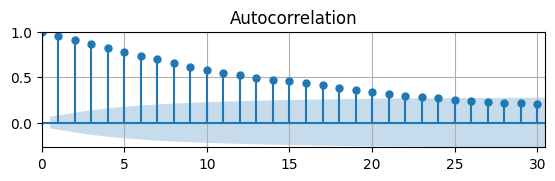

In [10]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
acf(URsim,ax)
ax.grid(); ax.autoscale(tight=True);

- This ACF approaches zero at shorter lags compared to the actual data.
- We know an AR($1$) model with $\phi = 0.9704$ generates stationary time series.
- Maybe the actual UR isn't stationary?

Actual UR: E(y) = 5.67, Std(y) = 1.71, AC(y) = 0.97
Simulated UR: E(y) = 5.21, Std(y) = 1.34, AC(y) = 0.95


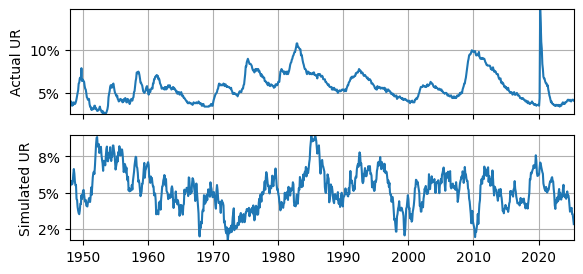

In [11]:
# Add simulation to DataFrame
data['URsim'] = URsim
#  Variables to plot and ylabel
plotme = [['UR','Actual UR'],['URsim','Simulated UR']]
# Plot variables
fig, axs = plt.subplots(len(plotme),figsize=(6.5,3))
for idx, ax in enumerate(axs.flat):
    y = data[plotme[idx][0]]; ylabel = plotme[idx][1]
    ax.plot(y); ax.set_ylabel(ylabel)
    ax.yaxis.set_major_formatter('{x:.0f}%')
    ax.grid(); ax.autoscale(tight=True); ax.label_outer()
    print(f'{ylabel}: \
E(y) = {y.mean():.2f}, Std(y) = {y.std():.2f}, \
AC(y) = {y.corr(y.shift(1)):.2f}')

### Does it fit?

- The actual UR is very smooth, but the AR(1) model is not.
- The simulated UR often falls below $2\%$, whereas the actual UR does not.
- The actual UR meets or exceeds $10\%$ a few times, whereas the simulated UR does not.
- The actual UR rises quickly and falls slowly, whereas the simulated UR seems to rise and fall at roughly the same rates.
- This all suggests that the AR(1) model is unable to reproduce some important features of the actual UR.

## Partial ACF

- Most of the slides in this chapter are about the AR($1$) model.
- Suppose the true DGP is an AR model, but we do not know the order.
- When the DGP is a MA model, we can use the ACF to determine the order since it drops off to zero after a certain lag.
- But for AR model, the autocorrelation at higher lags is influenced by the intermediate observations between $t$ and $t-k$, and even for an AR($1$) model the ACF tapers slowly.
- Alternatively, **Partial ACF (PACF)** helps to identify the order of an AR model.
- The **PACF** at lag $k$ is the correlation between $y_t$ and $y_{t-k}$ that is not explained by observations in between, $\{y_{t-k+1}:y_{t-1}\}$
- The **PACF** at lag $k$ is denoted as $\phi_{kk}$, and plotting $\phi_{kk}$ against lag $k$ forms the **PACF plot**.

### AR($2$) Model

- Let's simulate the following AR($2$) model

   $$
   y_t = (1-\phi_1-\phi_2)\mu + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \sigma \varepsilon_t
   $$

  where $\mu = 2$, $\phi_1 = 0.8$, $\phi_2 = 0.15$, and $\sigma = 0.5$
- We know the DGP and the true order of the AR model. Does the PACF suggest the same order?

In [12]:
# Assign parameters
T = 501; mu = 2; phi_1 = 0.8; phi_2 = 0.15; sigma = 0.5;
# Draw random numbers
rng = np.random.default_rng(seed=0)
eps = rng.standard_normal(T)
# Simulate time series
y = mu*np.ones([T,1])
for t in range(2,T):
    y[t,0] = (1-phi_1-phi_2)*mu + phi_1*y[t-1,0] + phi_2*y[t-2,0] + sigma*eps[t]

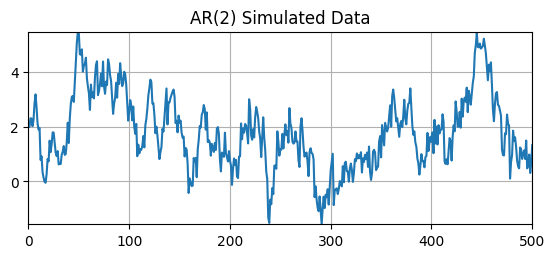

In [13]:
# Convert to DataFrame and plot
df = pd.DataFrame(y)
fig, ax = plt.subplots(figsize=(6.5,2.5))
ax.plot(df); ax.set_title('AR(2) Simulated Data')
ax.grid(); ax.autoscale(tight=True)

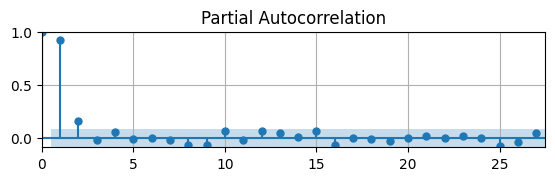

In [14]:
# Partial auto-correlation function
from statsmodels.graphics.tsaplots import plot_pacf as pacf
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
pacf(df,ax)
ax.grid(); ax.autoscale(tight=True);

- The PACF is significantly different from zero for $k = \{1,2\}$, which indicates the DGP is probably an AR($2$).
- So the PACF is good at deterimining order so long as AR coefficients are large enough.

## Modeling UR as AR($2$)

- Is a higher order AR model a good fit for the U.S. unemployment rate?
- Let's first plot the PACF of the UR to see if we can determine an order.

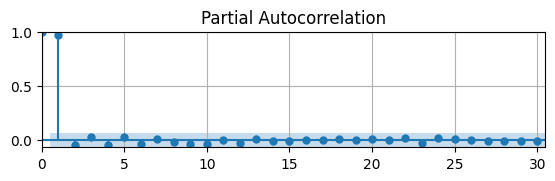

In [15]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
pacf(data.UR,ax);
ax.grid(); ax.autoscale(tight=True)

This suggests that an AR(1) might be the best model.

- What if we ignore the PACF and estimate an AR(2) anyway?

In [16]:
# Define model
mod = ARIMA(data.UR,order=(2,0,0))
# Estimate model
res = mod.fit()
summary = res.summary()
# Print summary tables
tab0 = summary.tables[0].as_html()
tab1 = summary.tables[1].as_html()
tab2 = summary.tables[2].as_html()
#print(tab0); print(tab1); print(tab2)

### Estimation Results

<table class="simpletable">
<tr>
  <th>Dep. Variable:</th>         <td>VALUE</td>      <th>  No. Observations:  </th>    <td>925</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARIMA(2, 0, 0)</td>  <th>  Log Likelihood     </th> <td>-495.314</td>
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>  <td>    5.5611</td> <td>    0.740</td> <td>    7.510</td> <td> 0.000</td> <td>    4.110</td> <td>    7.012</td>
</tr>
<tr>
  <th>ar.L1</th>  <td>    <font color="#FF0000">1.0208</font></td> <td>    0.009</td> <td>  109.007</td> <td> <font color="#FF0000">0.000</font></td> <td>    1.002</td> <td>    1.039</td>
</tr>
<tr>
  <th>ar.L2</th>  <td>   <font color="#FF0000">-0.0517</font></td> <td>    0.010</td> <td>   -5.057</td> <td> <font color="#FF0000">0.000</font></td> <td>   -0.072</td> <td>   -0.032</td>
</tr>
<tr>
  <th>sigma2</th> <td>    0.1703</td> <td>    0.001</td> <td>  143.540</td> <td> 0.000</td> <td>    0.168</td> <td>    0.173</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Heteroskedasticity (H):</th> <td>6.37</td> <th>  Skew:              </th>    <td><font color="#FF0000">16.65</font></td>  
</tr>
<tr>
  <th>Prob(H) (two-sided):</th>    <td>0.00</td> <th>  Kurtosis:          </th>   <td><font color="#FF0000">423.48</font></td>  
</tr>
</table>

- Both AR coefficients are significantly different from $0$
- But the AR(2) is still linear, i.e., normal and symmetric, so the residuals are still skewed and fat-tailed
- PACF did not help to determine that second lag might improve fit

## UR First Difference

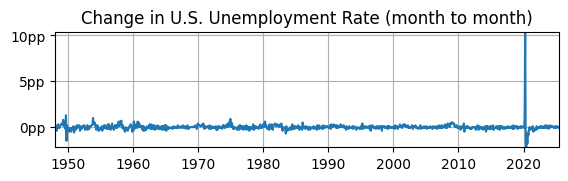

In [17]:
# Year-over-year growth rate
dUR = data.UR.diff(1); dUR = dUR.dropna()
# Plot
fig, ax = plt.subplots(figsize=(6.5,1.5));
ax.plot(dUR); ax.set_title('Change in U.S. Unemployment Rate (month to month)');
ax.yaxis.set_major_formatter('{x:,.0f}pp'); ax.grid(); ax.autoscale(tight=True)

Is it stationary?
- Yes, mean looks constant around $0$.
- Yes, volatility looks constant, except for COVID.
- Maybe not, it's impossible to see if the autocovariance is constant.

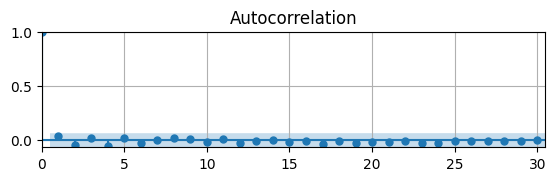

In [18]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
acf(dUR,ax)
ax.grid(); ax.autoscale(tight=True);

- The ACF indicates that the series is probably stationary.
- What does the PACF say?

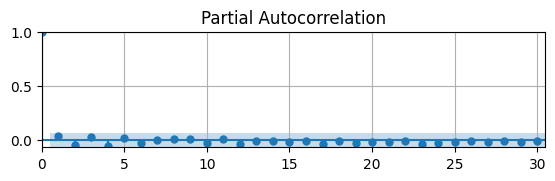

In [19]:
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
pacf(dUR,ax);
ax.grid(); ax.autoscale(tight=True)

- The PACF shows that the autocorrelation is not significantly different from zero for all lags.
- What is the best model to estimate? Let's try MA($1$) and AR($1$) and compare.

### Estimation Results

In [20]:
# Define model
mod0 = ARIMA(dUR,order=(0,0,1))
mod1 = ARIMA(dUR,order=(1,0,0))
# Estimate model
res = mod1.fit(); summary = res.summary()
# Print summary tables
tab0 = summary.tables[0].as_html()
tab1 = summary.tables[1].as_html()
tab2 = summary.tables[2].as_html()
#print(tab0); print(tab1); print(tab2)

<table class="simpletable">
<tr>
  <th>Dep. Variable:</th>         <td>VALUE</td>      <th>  No. Observations:  </th>    <td>924</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARIMA(0, 0, 1)</td>  <th>  Log Likelihood     </th> <td>-500.699</td>
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>  <td>    0.0007</td> <td>    0.025</td> <td>    0.027</td> <td> 0.979</td> <td>   -0.047</td> <td>    0.049</td>
</tr>
<tr>
  <th>ma.L1</th>  <td>    <font color="#FF0000">0.0398</font></td> <td>    0.008</td> <td>    4.893</td> <td> <font color="#FF0000">0.000</font></td> <td>    0.024</td> <td>    0.056</td>
</tr>
<tr>
  <th>sigma2</th> <td>    0.1731</td> <td>    0.001</td> <td>  185.366</td> <td> 0.000</td> <td>    0.171</td> <td>    0.175</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Heteroskedasticity (H):</th> <td>6.54</td> <th>  Skew:              </th>    <td>16.40</td>  
</tr>
<tr>
  <th>Prob(H) (two-sided):</th>    <td>0.00</td> <th>  Kurtosis:          </th>   <td>419.10</td>  
</tr>
</table>

- The MA coefficient estimate is statistically significantly different from $0$.
- However, the residuals are still probably heteroskedastic and not normally distributed.
- Thus, a linear/normal model is probably not the best choice.

<table class="simpletable">
<tr>
  <th>Dep. Variable:</th>         <td>VALUE</td>      <th>  No. Observations:  </th>    <td>924</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARIMA(1, 0, 0)</td>  <th>  Log Likelihood     </th> <td>-500.757</td>
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>  <td>    0.0007</td> <td>    0.025</td> <td>    0.026</td> <td> 0.979</td> <td>   -0.048</td> <td>    0.049</td>
</tr>
<tr>
  <th>ar.L1</th>  <td>    <font color="#FF0000">0.0363</font></td> <td>    0.008</td> <td>    4.344</td> <td> <font color="#FF0000">0.000</font></td> <td>    0.020</td> <td>    0.053</td>
</tr>
<tr>
  <th>sigma2</th> <td>    0.1731</td> <td>    0.001</td> <td>  185.413</td> <td> 0.000</td> <td>    0.171</td> <td>    0.175</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Heteroskedasticity (H):</th> <td>6.55</td> <th>  Skew:              </th>    <td>16.42</td>  
</tr>
<tr>
  <th>Prob(H) (two-sided):</th>    <td>0.00</td> <th>  Kurtosis:          </th>   <td>419.51</td>  
</tr>
</table>

- The AR coefficient is small/weak but  estimate is statistically significantly different from $0$.
- Like the MA($1$) model, the residuals are still probably heteroskedastic and not normally distributed.
- This again confirms that a linear/normal model is probably not the best choice.